In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import seaborn as sn


In [3]:
df = pd.read_csv('Train.csv')
x_train = df.drop(columns=['class'])
y_train= df['class']
y_trainsample = y_train.head(100)


In [4]:
for column in x_train.columns:
    if x_train[column].dtype==type(object):
         labelencoder = LabelEncoder()
         x_train[column] = labelencoder.fit_transform(x_train[column])
x_trainsample = x_train.head(100)

In [5]:
labelencoder = LabelEncoder()

y = labelencoder.fit_transform(y_trainsample)


In [6]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_trainsample, y)

SVC(kernel='linear')

In [7]:
df2 = pd.read_csv('Test.csv')
x1 = df2.drop(columns = ['class'])
y1= df2['class']
y2 = y1.head(100)

In [8]:
for column in x1.columns:
    if x1[column].dtype == type(object):
        labelencoder1 = LabelEncoder()
        x1[column] = labelencoder1.fit_transform(x1[column])


In [9]:
labelencoder = LabelEncoder()

y_test = labelencoder.fit_transform(y2)


In [10]:
x_test = x1.head(100)


In [11]:
y_pred = svclassifier.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[32 17]
 [ 6 45]]
              precision    recall  f1-score   support

           0       0.84      0.65      0.74        49
           1       0.73      0.88      0.80        51

    accuracy                           0.77       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100



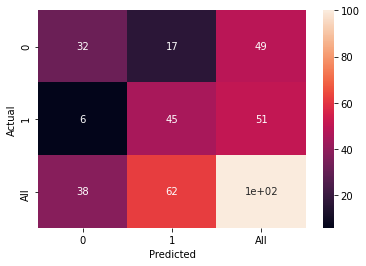

In [15]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(cm, annot=True)
plt.show()